In [94]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

In [95]:
import scipy.integrate as integrate
import scipy.special as special
from cmath import sin, cos, exp

# General integral, return (real part, imaginary part)
# All angles are in radians

def I0(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha))

def I1(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha))

def I2(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha))

In [96]:
from math import pi

def Ex(u, v, phi, alpha, A):
    return (A * (I0(u, v, alpha)[0][0] + I2(u, v, alpha)[0][0] * cos(2 * phi)).real, -1 * A * (I0(u, v, alpha)[1][0] + I2(u, v, alpha)[1][0] * cos(2 * phi)).real)

def Ey(u, v, phi, alpha, A):
    return (A * I2(u, v, alpha)[0][0] * sin(2 * phi).real, -1 * A * I2(u, v, alpha)[1][0] * sin(2 * phi).real)

def Ez(u, v, phi, alpha, A):
    return (-2 * A * I1(u, v, alpha)[0][0] * cos(phi).real, -2 * A * I1(u, v, alpha)[1][0] * cos(phi).real)

In [103]:
print(I0(0,1,0.55))
print(Ex(1, 1, 2, 0.55, 1))

((0.2406640351729894, 2.6719075304825136e-15), (0.0, 0.0))
(-0.22877012589010462, 0.06287912453170526)


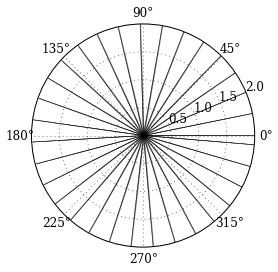

In [98]:
import matplotlib.pyplot as plt
from numpy import ma, meshgrid, arange, empty_like

# At the focal plane
alpha = 0.55                   # NA
A = 1
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

r, theta = meshgrid(arange(0, 2, 0.01), arange(0, 2 * pi, .2))

U = empty_like(r)
V = empty_like(r)

for i, rx in enumerate(r):
    for j, _r in enumerate(rx):
        U[i][j] = (Ex(0, _r * sin(alpha), theta[i][j], alpha, A)[0])
        V[i][j] = (Ex(0, _r * sin(alpha), theta[i][j], alpha, A)[1])

ax = plt.subplot(111, projection='polar')
ax.quiver(theta, r, U, V)

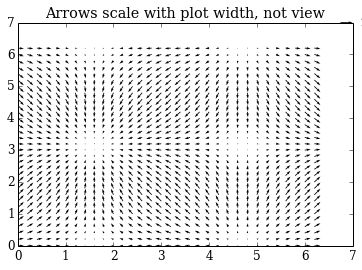

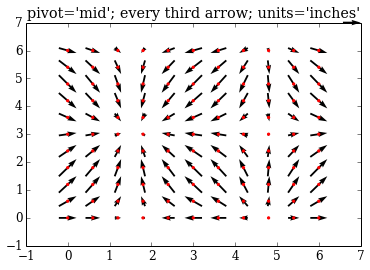

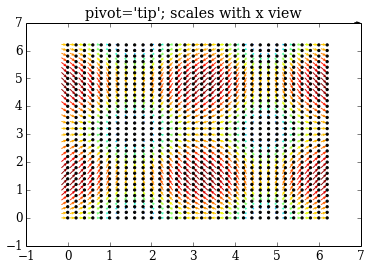

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.figure()
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.figure()
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)

plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars


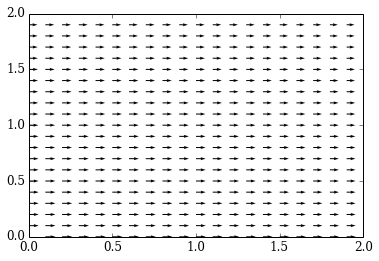

In [101]:
import matplotlib.pyplot as plt
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

X, Y = meshgrid(arange(0, 2, 0.1), arange(0, 2, 0.1))

U = empty_like(X)
V = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        U[i][j] = (Ex(0, sqrt(_x ** 2 + Y[i][j] ** 2) * sin(alpha), arctan(Y[i][j] / _x), alpha, A)[0])
        V[i][j] = (Ex(0, sqrt(_x ** 2 + Y[i][j] ** 2) * sin(alpha), arctan(Y[i][j] / _x), alpha, A)[1])

ax = plt.subplot(111)
ax.quiver(X, Y, U, V)

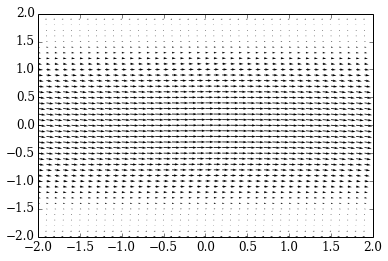

In [110]:
import matplotlib.pyplot as plt
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# Along the axis
alpha = 0.55                   # NA
A = 1
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

X, Z = meshgrid(arange(-2, 2, 0.1), arange(-2, 2, 0.1))

U = empty_like(X)
V = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        U[i][j] = (Ex(Z[i][j] * sin(alpha) ** 2, abs(_x) * sin(alpha), 0, alpha, A)[0])
        V[i][j] = (Ez(Z[i][j] * sin(alpha) ** 2, abs(_x) * sin(alpha), 0, alpha, A)[0])

ax = plt.subplot(111)
ax.quiver(X, Z, U, V)